# 0. Setup Paths

In [1]:
import os

In [57]:
!pip install git+https://github.com/philferriere/cocoapi.git#egg=pycocotools^&subdirectory=PythonAPI

^C


In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

paths['APIMODEL_PATH']

'Tensorflow\\models'

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins

In [17]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models.git {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  10% (385/3559)
Updating files:  11% (392/3559)
Updating files:  12% (428/3559)
Updating files:  13% (463/3559)
Updating files:  14% (499/3559)
Updating files:  15% (534/3559)
Updating files:  16% (570/3559)
Updating files:  17% (606/3559)
Updating files:  18% (641/3559)
Updating files:  19% (677/3559)
Updating files:  20% (712/3559)
Updating files:  21% (748/3559)
Updating files:  22% (783/3559)
Updating files:  22% (815/3559)
Updating files:  23% (819/3559)
Updating files:  24% (855/3559)
Updating files:  25% (890/3559)
Updating files:  26% (926/3559)
Updating files:  27% (961/3559)
Updating files:  28% (997/3559)
Updating files:  29% (1033/3559)
Updating files:  30% (1068/3559)
Updating files:  31% (1104/3559)
Updating files:  32% (1139/3559)
Updating files:  33% (1175/3559)
Updating files:  33% (1201/3559)
Updating files:  34% (1211/3559)
Updating files:  35% (1246/3559)
Updating files:  36% (1282/3559)
Updating files:  37% (1317/

In [20]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build

D:\YouTube\Tensorflow Object Detection\TFODCourse\tfod\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
D:\YouTube\Tensorflow Object Detection\TFODCourse\tfod\Lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-311: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-311: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-311: module MAY be using inspect.stack
D:\YouTube\Tensorflow Object Detection\TFODCourse\tfod\Lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning:  is an invalid version and will not be suppo

byte-compiling build\bdist.win-amd64\egg\object_detection\models\embedded_ssd_mobilenet_v1_feature_extractor.py to embedded_ssd_mobilenet_v1_feature_extractor.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\embedded_ssd_mobilenet_v1_feature_extractor_tf1_test.py to embedded_ssd_mobilenet_v1_feature_extractor_tf1_test.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\faster_rcnn_inception_resnet_v2_feature_extractor.py to faster_rcnn_inception_resnet_v2_feature_extractor.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\faster_rcnn_inception_resnet_v2_feature_extractor_tf1_test.py to faster_rcnn_inception_resnet_v2_feature_extractor_tf1_test.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\faster_rcnn_inception_resnet_v2_keras_feature_extractor.py to faster_rcnn_inception_resnet_v2_keras_feature_extractor.cpython-311.pyc
byte-compiling build\bdist.win-amd64\egg\

DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins

In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.11.4: D:\YouTube\Tensorflow Object Detection\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-08-09 11:30:17.489705: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0809 11:30:17.699939  8088 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
D:\YouTube\Tensorflow Object Detection\TFODCourse\tfod\Lib\site-packages\object_detection-0.1-py3.11.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'war

In [18]:
!pip install google.protobuf

DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins

In [20]:
!python --version

Python 3.11.1


In [21]:
!pip install protobuf==3.20.*

DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins


  Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)


In [22]:
!pip install tensorflow --upgrade

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/d1/93/0f4cf5058095d749d464e4f770d2bf339930e5f3374331f0d2fa6d

DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins

   -- ------------------------------------- 16.1/276.6 MB 1.1 MB/s eta 0:04:01
   -- ------------------------------------- 16.2/276.6 MB 1.1 MB/s eta 0:04:01
   -- ------------------------------------- 16.2/276.6 MB 1.1 MB/s eta 0:04:00
   -- ------------------------------------- 16.2/276.6 MB 1.1 MB/s eta 0:04:01
   -- ------------------------------------- 16.3/276.6 MB 1.1 MB/s eta 0:04:01
   -- ------------------------------------- 16.3/276.6 MB 1.1 MB/s eta 0:04:01
   -- ------------------------------------- 16.4/276.6 MB 1.1 MB/s eta 0:03:59
   -- ------------------------------------- 16.4/276.6 MB 1.1 MB/s eta 0:03:57
   -- ------------------------------------- 16.4/276.6 MB 1.1 MB/s eta 0:03:58
   -- ------------------------------------- 16.5/276.6 MB 1.1 MB/s eta 0:03:58
   -- ------------------------------------- 16.5/276.6 MB 1.1 MB/s eta 0:03:58
   -- ------------------------------------- 16.5/276.6 MB 1.1 MB/s eta 0:03:57
   -- ------------------------------------- 16.5/276

In [6]:
!pip install tensorflow

DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins

In [26]:
# !pip uninstall protobuf matplotlib -y
# !pip install protobuf matplotlib==3.2
!pip install --default-timeout=100 matplotlib
# !python -m pip install --upgrade pip

DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins

In [43]:
import object_detection

In [7]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: D:\YouTube\Tensorflow Object Detection\TFODCourse\tfod\Lib\site-packages
Requires: tensorflow-intel
Required-by: tensorflowjs, tf-models-official


DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins

In [8]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [......................................................................] 211996178 / 211996178        1 file(s) moved.


x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [6]:
labels = [{'name':'thumbsup', 'id':1},{'name':'thumbsdown', 'id':2},{'name':'earpods', 'id':3},{'name':'mobile', 'id':4}]
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [8]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [9]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [36]:
!pip install pytz

DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins


  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)


In [10]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [11]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [12]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [13]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [14]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [15]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [17]:
# pipeline_config.model.faster_rcnn.num_classes = len(labels)
# pipeline_config.train_config.batch_size = 4
# pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
# pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
# pipeline_config.train_input_config.label_map_path= files['LABELMAP']
# pipeline_config.tf_record_input_reader.input_path = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
# pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
# pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [16]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.r')]

In [17]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [7]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [8]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=500".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [9]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=500


In [20]:
!{command}

# 7. Evaluate the Model

In [10]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [11]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [26]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [27]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [28]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [30]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'thumbsdown.fa4f8956-2d0b-11ee-87d5-e8d0fcf83928.jpg')

In [31]:
IMAGE_PATH

'Tensorflow\\workspace\\images\\test\\thumbsdown.fa4f8956-2d0b-11ee-87d5-e8d0fcf83928.jpg'

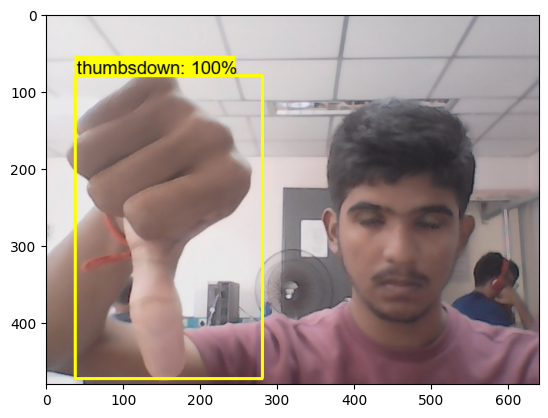

In [32]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [133]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [134]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [135]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tunned\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tunned --output_directory=Tensorflow\workspace\models\my_ssd_mobnet_tunned\export


In [136]:
!{command}

2023-08-02 15:13:46.086163: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0802 15:13:47.124008  1900 deprecation.py:641] From D:\YouTube\Tensorflow Object Detection\TFODCourse\tfod\Lib\site-packages\tensorflow\python\autograph\impl\api.py:459: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results 

# 11. Conversion to TFJS

In [32]:
!pip install tensorflowjs

  Obtaining dependency information for tensorflowjs from https://files.pythonhosted.org/packages/29/f8/f83b725878d8bd3305c7674221ee158b272cfed0ef3a7110e59f31cbcc13/tensorflowjs-4.9.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
     ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/189.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/189.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/189.9 kB ? eta -:--:--
     ----- ------------------------------- 30.7/189.9 kB 145.2 kB/s eta 0:00:02
     ----- ------------------------------- 30.7/189

DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\keras-2.13.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\lvis-0.5.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at d:\youtube\tensorflow object detection\tfodcourse\tfod\lib\site-packages\pandas-2.0.3-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package ins

In [6]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [7]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet_tunned\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet_tunned\tfjsexport


In [8]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet_tunned\tfjsexport\model.json...


2023-08-02 15:22:01.114204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 15:22:41.969374: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2023-08-02 15:22:41.969730: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session


In [140]:
!pip install numpy==1.23.5

^C


In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [9]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [10]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [11]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tunned\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tunned --output_directory=Tensorflow\workspace\models\my_ssd_mobnet_tunned\tfliteexport


In [12]:
!{command}

2023-08-02 15:24:28.278953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0802 15:24:40.504332  5768 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
2023-08-02 15:24:52.030004: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
I0802 15:24:56.234948  5768 api.py:460] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0802 15:25:02.353646  5768 signature_serialization.py:148] Function `inference_fn` contains input name(s) resource with unsupported characters which will be renamed to weightsharedconvolutionalboxpredictor_predictiontower_conv2d_3_batchnorm_feature_4_fusedbatchnormv3_readvariableop_1_resource in

In [13]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [14]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [15]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tunned\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet_tunned\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [16]:
!{command}

2023-08-02 15:27:46.709846: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 15:30:41.011904: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-02 15:30:41.011953: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-02 15:30:41.018193: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: Tensorflow\workspace\models\my_ssd_mobnet_tunned\tfliteexport\saved_model
2023-08-02 15:30:41.273210: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-02 15:30:41.274007: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: 

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')